<h1>Data Filtering 1: using SAC (contrails and no-contrails) </h1>

<h4>Step 1: Call the SAC result and build the graph</h4>

In [1]:
import pandas as pd

#Make df of the csv file
sac_df = pd.read_csv('SAC_result.csv')
sac_df

,Altitude (m),Pressure (Pa),G,TLM (K),U,TLC_new (K)
0,4000,61640.213740,0.047172,242.918803,0.0,231.699556
1,4000,61640.213740,0.047172,242.918803,0.2,232.498645
2,4000,61640.213740,0.047172,242.918803,0.4,233.466775
3,4000,61640.213740,0.047172,242.918803,0.6,234.710788
4,4000,61640.213740,0.047172,242.918803,0.8,236.518915
...,...,...,...,...,...,...
85,18000,7504.830919,0.005743,220.853058,0.2,212.417212
86,18000,7504.830919,0.005743,220.853058,0.4,213.199736
87,18000,7504.830919,0.005743,220.853058,0.6,214.205046
88,18000,7504.830919,0.005743,220.853058,0.8,215.663727


In [2]:
# Pivot the DataFrame
df_pivot = sac_df.pivot(index='Altitude (m)', columns='U', values='TLC_new (K)')

# Display the pivoted DataFrame
df_pivot

U,0.0,0.2,0.4,0.6,0.8,1.0
Altitude (m),,,,,,
4000,231.699556,232.498645,233.466775,234.710788,236.518915,241.576292
5000,230.318557,231.106642,232.061359,233.288061,235.070849,240.058054
6000,228.922214,229.699256,230.640507,231.849838,233.606249,238.523019
7000,227.509760,228.275711,229.202517,230.395328,232.126267,236.972050
8000,226.080375,226.835184,227.748492,228.922767,230.629037,235.402959
9000,224.633184,225.376793,226.276540,227.433183,229.113636,233.814514
10000,223.167251,223.899594,224.785712,225.924615,227.579083,232.204464
11000,221.681574,222.402580,223.274995,224.396037,226.024329,230.572512
12000,220.197609,220.906920,221.766212,222.869528,224.471829,228.943152


In [3]:
df_normal = df_pivot.reset_index()

# Display the resulting DataFrame
df_normal


U,Altitude (m),0.0,0.2,0.4,0.6000000000000001,0.8,1.0
0,4000,231.699556,232.498645,233.466775,234.710788,236.518915,241.576292
1,5000,230.318557,231.106642,232.061359,233.288061,235.070849,240.058054
2,6000,228.922214,229.699256,230.640507,231.849838,233.606249,238.523019
3,7000,227.509760,228.275711,229.202517,230.395328,232.126267,236.972050
4,8000,226.080375,226.835184,227.748492,228.922767,230.629037,235.402959
5,9000,224.633184,225.376793,226.276540,227.433183,229.113636,233.814514
6,10000,223.167251,223.899594,224.785712,225.924615,227.579083,232.204464
7,11000,221.681574,222.402580,223.274995,224.396037,226.024329,230.572512
8,12000,220.197609,220.906920,221.766212,222.869528,224.471829,228.943152
9,13000,218.737143,219.436223,220.281265,221.366791,222.943579,227.338361


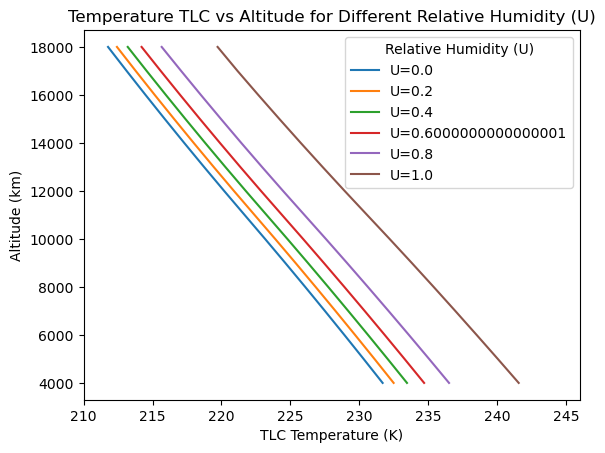

In [4]:
import matplotlib.pyplot as plt

# Clear the figure
plt.clf()

# Plot the graph for each U value
for u_value in df_pivot.columns:
    plt.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')

# Add labels and legend
plt.xlabel('TLC Temperature (K)')
plt.ylabel('Altitude (km)')
plt.legend(title='Relative Humidity (U)')
plt.xlim(210, 246)
plt.title('Temperature TLC vs Altitude for Different Relative Humidity (U)')

# Show the plot
plt.show()

<h4>Step 2 : Clean the Data by dropping NaV values</h4>

In [5]:
import os
import pandas as pd

folder_path = 'C:/Users/ASUS/Directory Jupyter/FAIP Directory/Project/faip_contrail_23/data/opensky_era5'
all_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

dfs = []  # List to store individual DataFrames

for file in all_files:
    file_path = os.path.join(folder_path, file)
    dfs.append(pd.read_parquet(file_path, engine='pyarrow'))

# Combine all individual DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
data = combined_df
data

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,vertical_rate,callsign,u_component_of_wind,v_component_of_wind,temperature,specific_humidity
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.037550,-16.015054,216.671343,0.000017
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.054751,-16.045876,216.673689,0.000017
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,0.0,A7MED,7.031101,-16.166471,216.627322,0.000017
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,0.0,A7MED,6.999383,-16.280800,216.577196,0.000018
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,0.0,A7MED,6.961761,-16.392197,216.524592,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,-1856.0,VLG230Y,2.475206,17.934521,236.558149,0.000217
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,-1856.0,VLG230Y,2.299276,18.114492,237.644418,0.000233
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,-1024.0,WZZ4YG,3.431344,21.751816,243.827451,0.000456
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,-1472.0,WZZ4YG,3.416564,21.806985,243.803234,0.000455


In [6]:
data.isna().sum()

timestamp                0
flight_id                0
icao24                   0
latitude                 0
longitude                0
altitude                 0
geoaltitude            836
groundspeed            667
track                  667
track_unwrapped        667
vertical_rate          667
callsign                 0
u_component_of_wind    503
v_component_of_wind    503
temperature            503
specific_humidity      503
dtype: int64

In [7]:
data_clean = data.dropna(subset=['temperature', 'specific_humidity'])
data_clean

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,vertical_rate,callsign,u_component_of_wind,v_component_of_wind,temperature,specific_humidity
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.037550,-16.015054,216.671343,0.000017
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.054751,-16.045876,216.673689,0.000017
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,0.0,A7MED,7.031101,-16.166471,216.627322,0.000017
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,0.0,A7MED,6.999383,-16.280800,216.577196,0.000018
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,0.0,A7MED,6.961761,-16.392197,216.524592,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,-1856.0,VLG230Y,2.475206,17.934521,236.558149,0.000217
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,-1856.0,VLG230Y,2.299276,18.114492,237.644418,0.000233
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,-1024.0,WZZ4YG,3.431344,21.751816,243.827451,0.000456
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,-1472.0,WZZ4YG,3.416564,21.806985,243.803234,0.000455


<h4>Step 3 : Calculate the Relative Humidity</h4>

In [8]:
import numpy as np
# Constant
gas_constant_water_vapor = 461.51
gas_constant_dry_air = 287.05
T_st = 372.15 #K
p_st = 101325/100 #hPa
M_H2O = 18.01528  # g/mol
data_clean['altitude_m'] = data_clean['altitude'] * 0.3048  # Convert altitude from feet to meters
T0 = 288.15  # Standard sea level temperature in Kelvin
P0 = 101325  # Standard sea level pressure in Pascal
L = 0.0065  # Temperature lapse rate in K/m
R = 287.05  # Gas constant for dry air in J/(kg*K)
g0 = 9.8  # Gravitational acceleration in m/s^2

    
#Calculate the saturation pressure = e_w #Pa
data_clean['saturation_pressure'] = p_st * 10 ** (-7.90298 * (T_st / data_clean['temperature'] - 1) + 5.02808 * np.log10(T_st /  data_clean['temperature']) - 1.3816e-7 * (10**(11.344 * (1 -  data_clean['temperature'] / T_st))-1) + 8.1328e-3 * (10 ** (-3.49149 * (T_st /  data_clean['temperature']-1))-1))*100

#Calculate the pressure
data_clean['pressure'] = P0 * (1 - L * data_clean['altitude_m']  / T0) ** (g0 / (R * L))

#Caculate the relative humidity
data_clean['relative_humidity'] = data_clean['specific_humidity'] * data_clean['pressure'] * (gas_constant_water_vapor/gas_constant_dry_air) / data_clean['saturation_pressure']

# Calculate the relative humidity
data_clean

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2735171409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['altitude_m'] = data_clean['altitude'] * 0.3048  # Convert altitude from feet to meters
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2735171409.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['saturation_pressure'] = p_st * 10 ** (-7.90298 * (T_st / data_clean['temperature'] - 1) + 5.02808 * np.log10(T_st /  data_clean['temperature']) - 1.3816e-7 * (10**(11.344 * (1 - 

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,vertical_rate,callsign,u_component_of_wind,v_component_of_wind,temperature,specific_humidity,altitude_m,saturation_pressure,pressure,relative_humidity
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.037550,-16.015054,216.671343,0.000017,11277.60,3.163737,21681.076310,0.190136
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,0.0,A7MED,7.054751,-16.045876,216.673689,0.000017,11277.60,3.164644,21681.076310,0.190242
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,0.0,A7MED,7.031101,-16.166471,216.627322,0.000017,11277.60,3.146749,21681.076310,0.192887
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,0.0,A7MED,6.999383,-16.280800,216.577196,0.000018,11277.60,3.127507,21681.076310,0.195659
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,0.0,A7MED,6.961761,-16.392197,216.524592,0.000018,11277.60,3.107429,21681.076310,0.198482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,-1856.0,VLG230Y,2.475206,17.934521,236.558149,0.000217,7155.18,28.532204,40196.355766,0.490986
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,-1856.0,VLG230Y,2.299276,18.114492,237.644418,0.000233,7018.02,31.790983,40981.444210,0.483807
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,-1024.0,WZZ4YG,3.431344,21.751816,243.827451,0.000456,6202.68,57.636124,45908.742806,0.583974
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,-1472.0,WZZ4YG,3.416564,21.806985,243.803234,0.000455,6202.68,57.505772,45908.742806,0.584054


<h4>Step 4 : Interpolate the Value of TLC in Flights Data Altitude</h4>

In [9]:
import math

# Function to map values from table 1 based on conditions
def TLC_interpolation(row):
    rh_value = round(row['relative_humidity'], 1)
    altitude_value = row['altitude_m']
    
    if math.isclose(rh_value, 0, abs_tol=0.1):  # Adjust the tolerance as needed
        return df_normal.iloc[0, 1] + ((df_normal.iloc[14, 1] - df_normal.iloc[0, 1]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    elif math.isclose(rh_value, 0.2, abs_tol=0.1):
        return df_normal.iloc[0, 2] + ((df_normal.iloc[14, 2] - df_normal.iloc[0, 2]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    elif math.isclose(rh_value, 0.4, abs_tol=0.1):
        return df_normal.iloc[0, 3] + ((df_normal.iloc[14, 3] - df_normal.iloc[0, 3]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    elif math.isclose(rh_value, 0.6, abs_tol=0.1):
        return df_normal.iloc[0, 4] + ((df_normal.iloc[14, 4] - df_normal.iloc[0, 4]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    elif math.isclose(rh_value, 0.8, abs_tol=0.1):
        return df_normal.iloc[0, 5] + ((df_normal.iloc[14, 5] - df_normal.iloc[0, 5]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    elif math.isclose(rh_value, 1, abs_tol=0.1):
        return df_normal.iloc[0, 6] + ((df_normal.iloc[14, 6] - df_normal.iloc[0, 6]) / (df_normal.iloc[14, 0] - df_normal.iloc[0, 0])) * (altitude_value - df_normal.iloc[0, 0])
    else:
        return None

# Apply the mapping function to create a new column in data
data_clean['TLC_interpolation'] = data_clean.apply(lambda row: TLC_interpolation(row), axis=1)

# Display the result
data_clean


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2860225666.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['TLC_interpolation'] = data_clean.apply(lambda row: TLC_interpolation(row), axis=1)


,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,callsign,u_component_of_wind,v_component_of_wind,temperature,specific_humidity,altitude_m,saturation_pressure,pressure,relative_humidity,TLC_interpolation
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,A7MED,7.037550,-16.015054,216.671343,0.000017,11277.60,3.163737,21681.076310,0.190136,222.059742
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,A7MED,7.054751,-16.045876,216.673689,0.000017,11277.60,3.164644,21681.076310,0.190242,222.059742
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,A7MED,7.031101,-16.166471,216.627322,0.000017,11277.60,3.146749,21681.076310,0.192887,222.059742
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,A7MED,6.999383,-16.280800,216.577196,0.000018,11277.60,3.127507,21681.076310,0.195659,222.059742
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,A7MED,6.961761,-16.392197,216.524592,0.000018,11277.60,3.107429,21681.076310,0.198482,222.059742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,...,VLG230Y,2.475206,17.934521,236.558149,0.000217,7155.18,28.532204,40196.355766,0.490986,228.899193
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,...,VLG230Y,2.299276,18.114492,237.644418,0.000233,7018.02,31.790983,40981.444210,0.483807,229.097752
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,...,WZZ4YG,3.431344,21.751816,243.827451,0.000456,6202.68,57.636124,45908.742806,0.583974,231.484532
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,...,WZZ4YG,3.416564,21.806985,243.803234,0.000455,6202.68,57.505772,45908.742806,0.584054,231.484532


<h4>Step 5 : Determine Wether the Contrail Forms or not</h4>

If T flight data < TLC --> Contrails Perform

If T flight data > TLC --> No Contrails

In [10]:
data_clean['Contrail'] = np.where(data_clean['temperature'] < data_clean['TLC_interpolation'], 'Yes', 'No')
data_clean

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\1208953531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Contrail'] = np.where(data_clean['temperature'] < data_clean['TLC_interpolation'], 'Yes', 'No')


,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,u_component_of_wind,v_component_of_wind,temperature,specific_humidity,altitude_m,saturation_pressure,pressure,relative_humidity,TLC_interpolation,Contrail
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,7.037550,-16.015054,216.671343,0.000017,11277.60,3.163737,21681.076310,0.190136,222.059742,Yes
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,7.054751,-16.045876,216.673689,0.000017,11277.60,3.164644,21681.076310,0.190242,222.059742,Yes
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,7.031101,-16.166471,216.627322,0.000017,11277.60,3.146749,21681.076310,0.192887,222.059742,Yes
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,6.999383,-16.280800,216.577196,0.000018,11277.60,3.127507,21681.076310,0.195659,222.059742,Yes
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,6.961761,-16.392197,216.524592,0.000018,11277.60,3.107429,21681.076310,0.198482,222.059742,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,...,2.475206,17.934521,236.558149,0.000217,7155.18,28.532204,40196.355766,0.490986,228.899193,No
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,...,2.299276,18.114492,237.644418,0.000233,7018.02,31.790983,40981.444210,0.483807,229.097752,No
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,...,3.431344,21.751816,243.827451,0.000456,6202.68,57.636124,45908.742806,0.583974,231.484532,No
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,...,3.416564,21.806985,243.803234,0.000455,6202.68,57.505772,45908.742806,0.584054,231.484532,No


In [11]:
data_clean['Contrail'].value_counts()

Contrail
Yes    44857
No     27225
Name: count, dtype: int64

<h4>Step 6 : Plot The result</h4>

<Figure size 640x480 with 0 Axes>

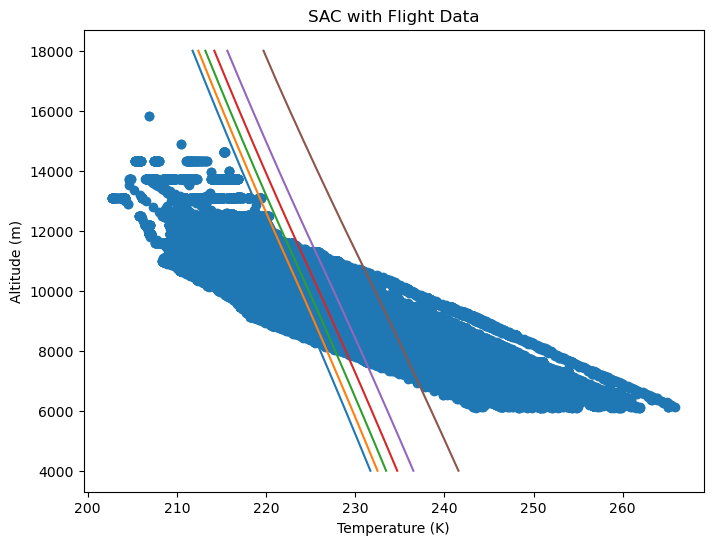

In [12]:
import matplotlib.pyplot as plt
plt.clf()

# Assuming fig1 and fig2 are your two figures
# Replace these with your actual figures

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first figure on the first subplot
for u_value in df_pivot.columns:
    ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  # Add your plot details here
    ax.set_title('SAC')

# Plot the second figure on the second subplot
ax.scatter(data_clean['temperature'], data_clean['altitude_m'])  # Add your plot details here
ax.set_title('Flight Data')

# Add titles and labels as needed
ax.set_title('SAC with Flight Data')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Altitude (m)')

# Show the combined figure
plt.show()


<h4>Step 7: Visualize flights that forms contrails</h4>

In [13]:
# Function to map values from table 1 based on conditions
def U_line(row):
    rh_value = round(row['relative_humidity'], 1)
    altitude_value = row['altitude_m']
    
    if math.isclose(rh_value, 0, abs_tol=0.1):  # Adjust the tolerance as needed
        return 0.0
    elif math.isclose(rh_value, 0.2, abs_tol=0.1):
        return 0.2
    elif math.isclose(rh_value, 0.4, abs_tol=0.1):
        return 0.4
    elif math.isclose(rh_value, 0.6, abs_tol=0.1):
        return 0.6
    elif math.isclose(rh_value, 0.8, abs_tol=0.1):
        return 0.8
    elif math.isclose(rh_value, 1, abs_tol=0.1):
        return 1.0
    else:
        return None

# Apply the mapping function to create a new column in data
data_clean['U_line_category'] = data_clean.apply(lambda row: U_line(row), axis=1)

# Display the result
data_clean


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2439874845.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['U_line_category'] = data_clean.apply(lambda row: U_line(row), axis=1)


,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,v_component_of_wind,temperature,specific_humidity,altitude_m,saturation_pressure,pressure,relative_humidity,TLC_interpolation,Contrail,U_line_category
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,-16.015054,216.671343,0.000017,11277.60,3.163737,21681.076310,0.190136,222.059742,Yes,0.2
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,-16.045876,216.673689,0.000017,11277.60,3.164644,21681.076310,0.190242,222.059742,Yes,0.2
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,-16.166471,216.627322,0.000017,11277.60,3.146749,21681.076310,0.192887,222.059742,Yes,0.2
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,-16.280800,216.577196,0.000018,11277.60,3.127507,21681.076310,0.195659,222.059742,Yes,0.2
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,-16.392197,216.524592,0.000018,11277.60,3.107429,21681.076310,0.198482,222.059742,Yes,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72580,2022-03-13 10:45:45+00:00,VLG230Y_124,346610,51.222656,3.637885,23475.0,23350.0,411.0,27.000516,27.000516,...,17.934521,236.558149,0.000217,7155.18,28.532204,40196.355766,0.490986,228.899193,No,0.4
72581,2022-03-13 10:46:00+00:00,VLG230Y_124,346610,51.248886,3.651915,23025.0,22900.0,411.0,13.088733,13.088733,...,18.114492,237.644418,0.000233,7018.02,31.790983,40981.444210,0.483807,229.097752,No,0.4
72582,2022-03-13 10:26:15+00:00,WZZ4YG_1586,471f87,51.925297,2.209167,20350.0,20575.0,380.0,294.743538,294.743538,...,21.751816,243.827451,0.000456,6202.68,57.636124,45908.742806,0.583974,231.484532,No,0.6
72583,2022-03-13 10:26:30+00:00,WZZ4YG_1586,471f87,51.936423,2.177961,20350.0,20250.0,379.0,295.007748,295.007748,...,21.806985,243.803234,0.000455,6202.68,57.505772,45908.742806,0.584054,231.484532,No,0.6


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\3979295889.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['color_numeric'] = data_clean['Contrail'].map(color_mapping)


<Figure size 640x480 with 0 Axes>

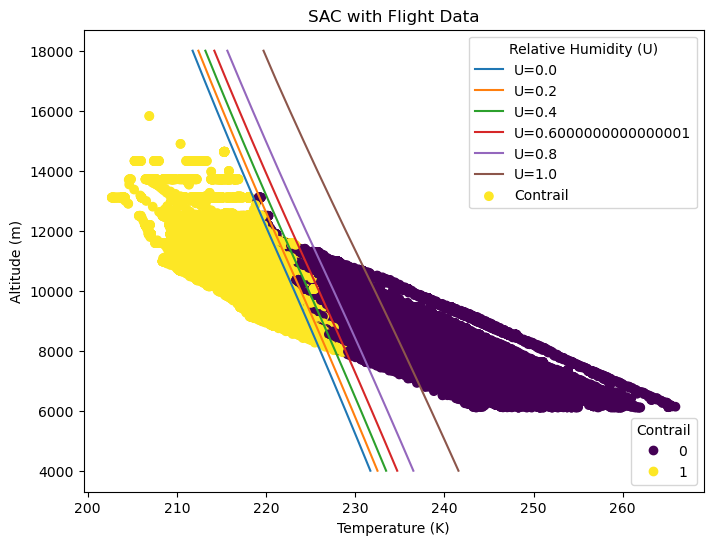

In [14]:
import matplotlib.pyplot as plt

plt.clf()

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first figure on the first subplot
for u_value in df_pivot.columns:
    ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  # Add your plot details here
    ax.set_title('SAC')
    ax.legend(title='Relative Humidity (U)')

# Map 'Yes' and 'No' to numeric values
color_mapping = {'Yes': 1, 'No': 0}
data_clean['color_numeric'] = data_clean['Contrail'].map(color_mapping)

# Plot the second figure on the second subplot
scatter_plot = ax.scatter(data_clean['temperature'], data_clean['altitude_m'], c=data_clean['color_numeric'], label='Contrail')  
ax.set_title('Flight Data')

# Add a color legend for 'yes' and 'no'
legend1 = ax.legend(*scatter_plot.legend_elements(), title='Contrail', loc="lower right")
legend2 = ax.legend(title='Relative Humidity (U)', loc="upper right")
ax.add_artist(legend1)

# Add titles and labels as needed
ax.set_title('SAC with Flight Data')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Altitude (m)')

# Show the combined figure
plt.show()



In [15]:
data_U_0 = data_clean.query('U_line_category == 0')
data_U_02 = data_clean.query('U_line_category == 0.2')
data_U_04 = data_clean.query('U_line_category == 0.4')
data_U_06 = data_clean.query('U_line_category == 0.6')
data_U_08 = data_clean.query('U_line_category == 0.8')
data_U_1 = data_clean.query('U_line_category == 1.0')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\3939510500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color_numeric'] = data['Contrail'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\3939510500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color_numeric'] = data['Contrail'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\3939510500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

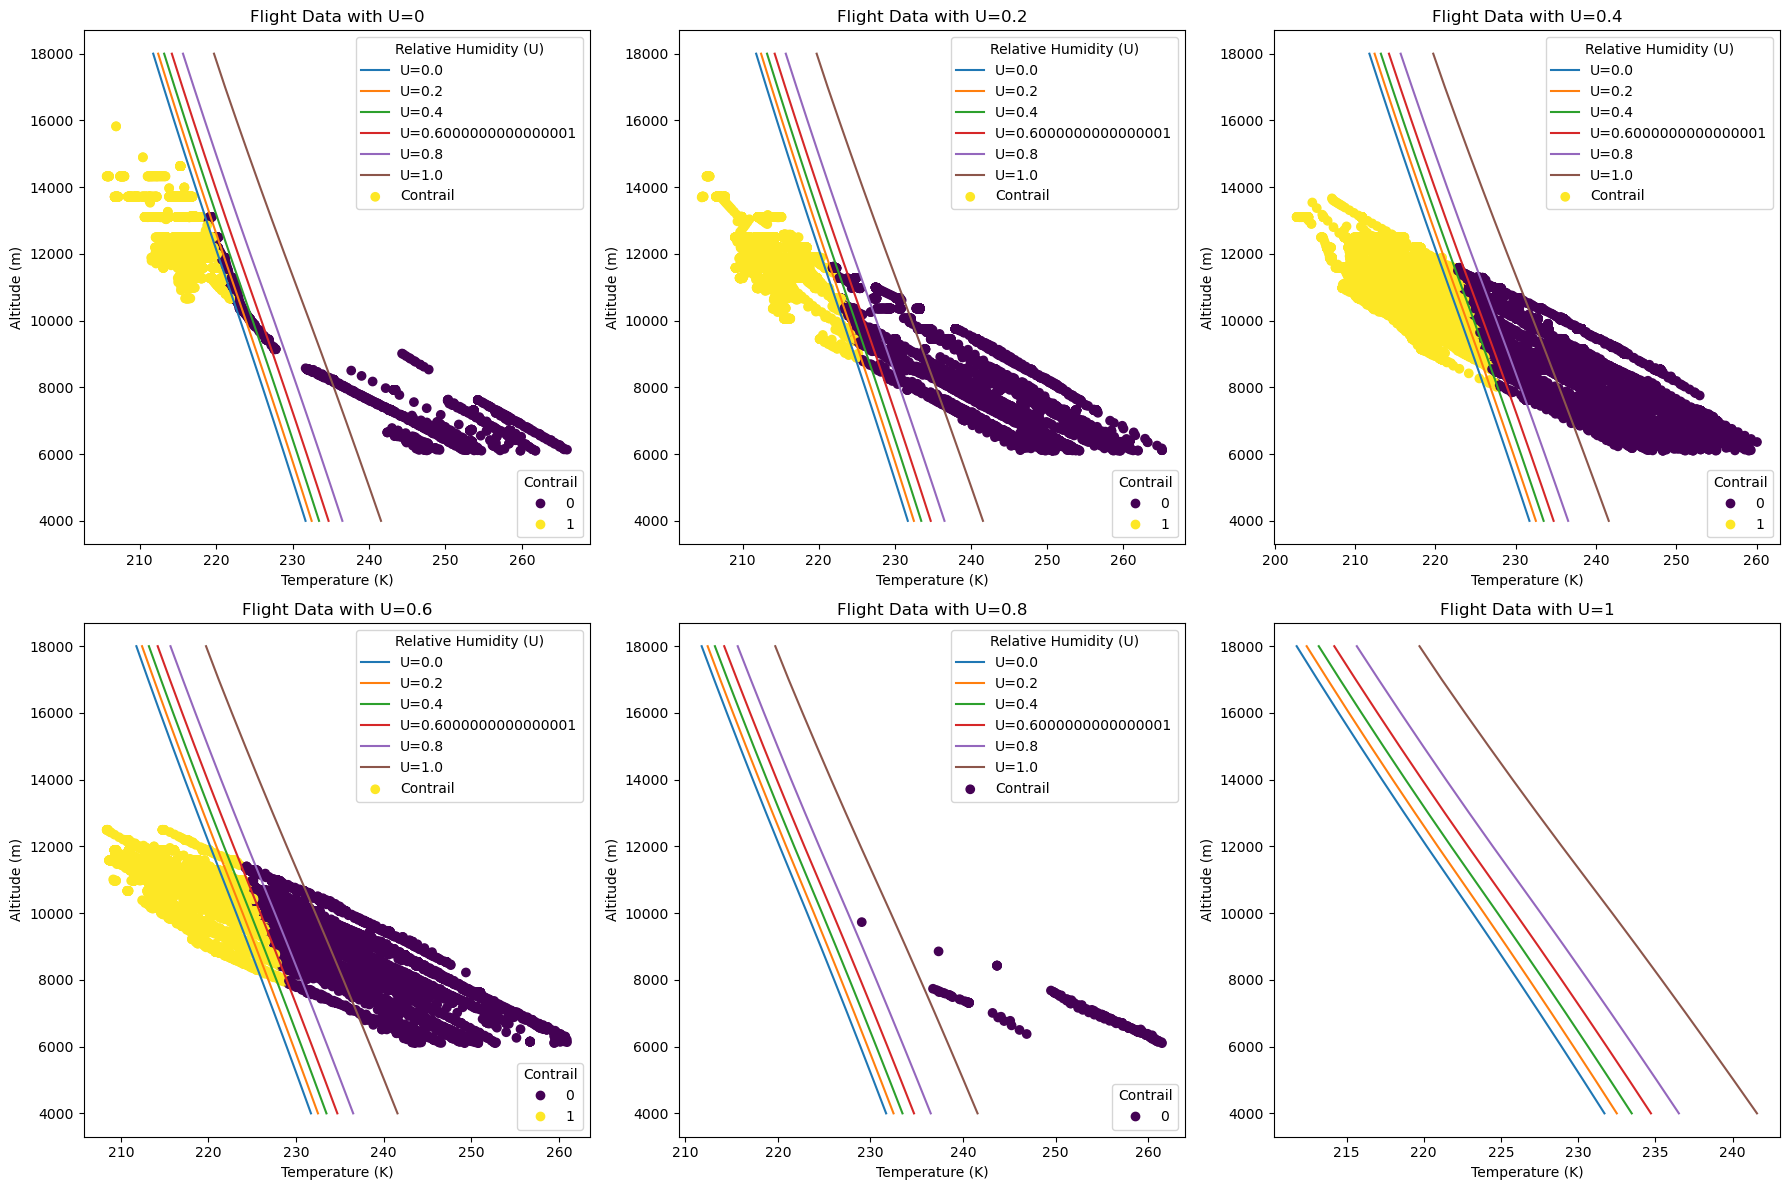

In [16]:
import matplotlib.pyplot as plt

def plot_combined_figure(ax, df_pivot, data, title_suffix):
    # Plot the first figure on the subplot
    for u_value in df_pivot.columns:
        ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  
        ax.set_title('SAC')
        

    # Map 'Yes' and 'No' to numeric values
    color_mapping = {'Yes': 1, 'No': 0}
    data['color_numeric'] = data['Contrail'].map(color_mapping)

    # Plot the scatter plot on the subplot
    scatter_plot = ax.scatter(data['temperature'], data['altitude_m'], c=data['color_numeric'], label='Contrail')  
    ax.set_title(f'Flight Data {title_suffix}')
    

    # Add a color legend for 'yes' and 'no'
    if len(scatter_plot.get_offsets()):  # Check if there are valid elements in the scatter plot
        legend1 = ax.legend(*scatter_plot.legend_elements(), title='Contrail', loc="lower right")
        legend2 = ax.legend(title='Relative Humidity (U)', loc="upper right")
        ax.add_artist(legend1)

    # Add titles and labels as needed
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Altitude (m)')

# Create subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Call the function for each set of data
plot_combined_figure(axs[0, 0], df_pivot, data_U_0, 'with U=0')
plot_combined_figure(axs[0, 1], df_pivot, data_U_02, 'with U=0.2')
plot_combined_figure(axs[0, 2], df_pivot, data_U_04, 'with U=0.4')
plot_combined_figure(axs[1, 0], df_pivot, data_U_06, 'with U=0.6')
plot_combined_figure(axs[1, 1], df_pivot, data_U_08, 'with U=0.8')
plot_combined_figure(axs[1, 2], df_pivot, data_U_1, 'with U=1')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
#plt.savefig('SAC with Flight Data.png')

# Show the combined figure
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2676668818.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['Contrail'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\2676668818.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marker'] = data['Contrail'].map(marker_mapping)
C:\Users\ASUS\anaconda3\envs\faip\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via 

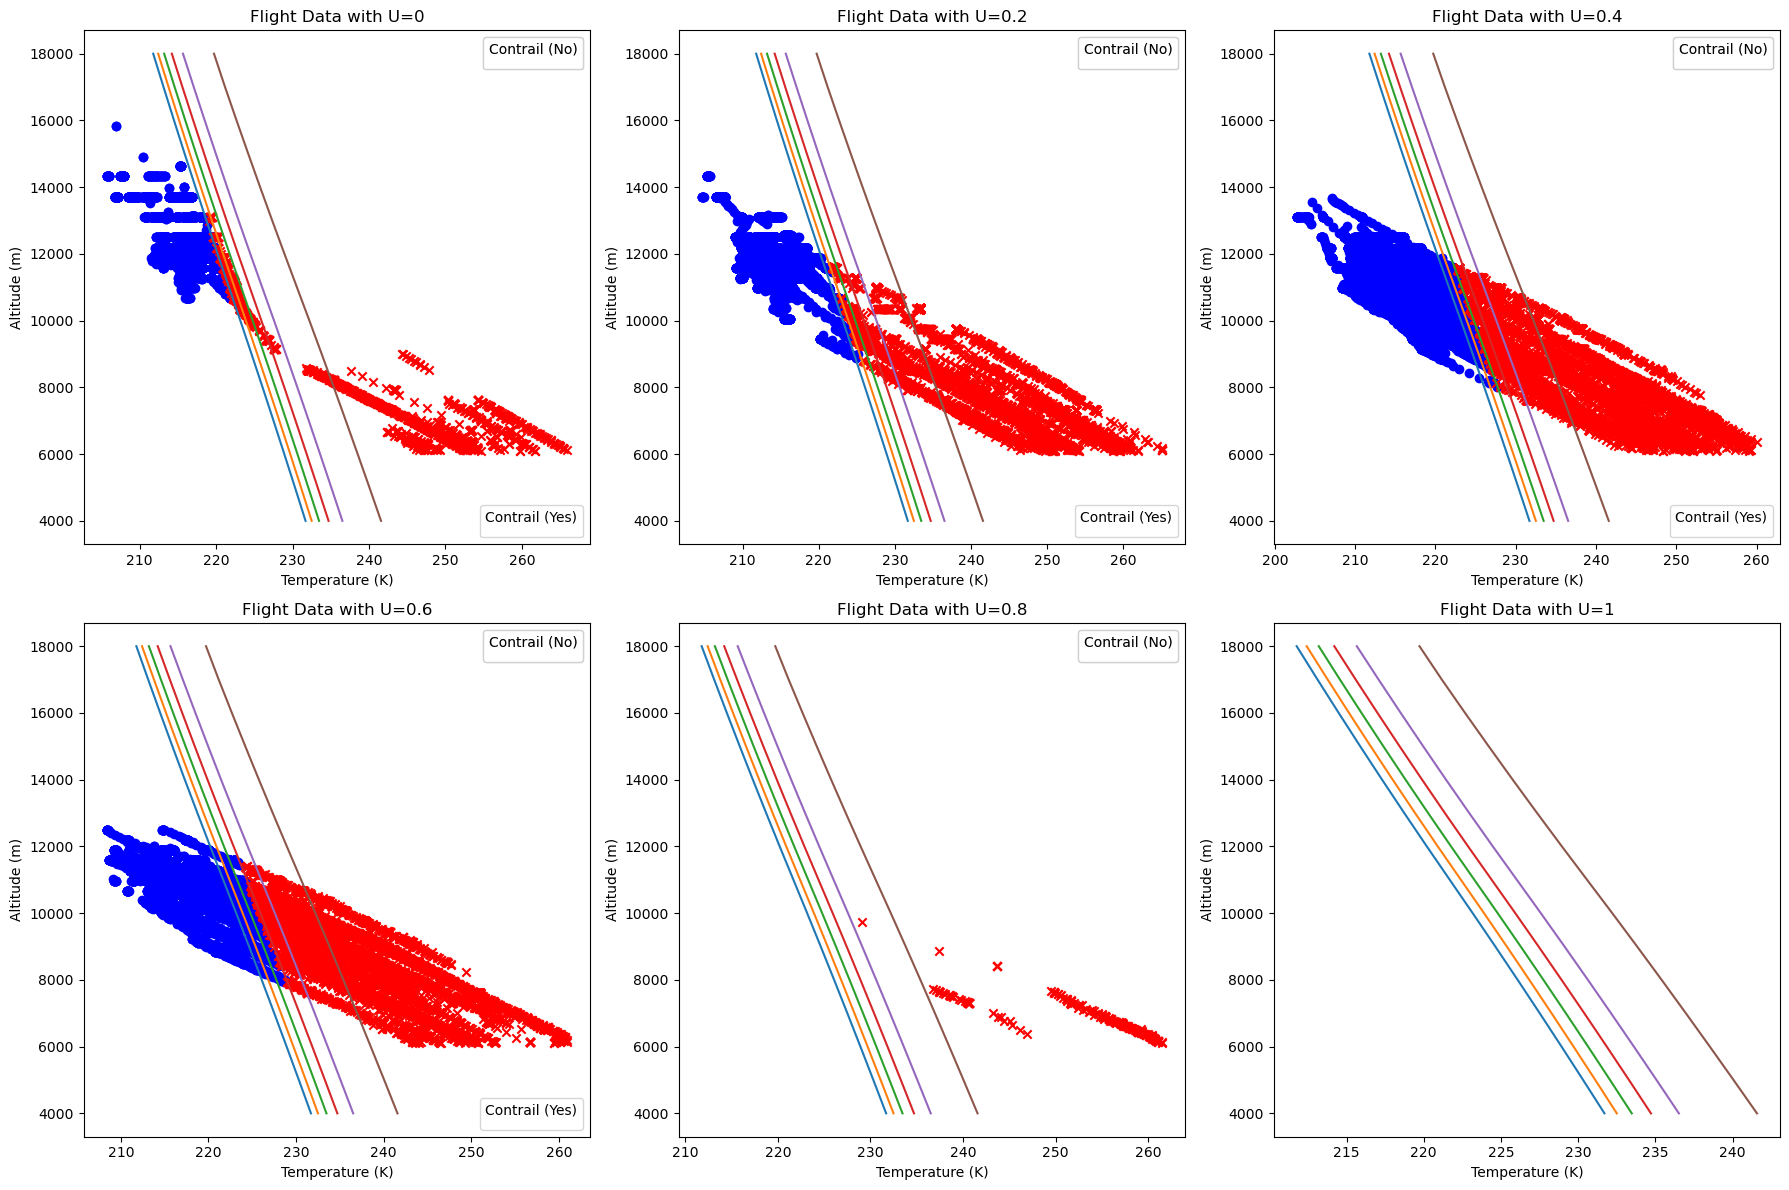

In [17]:
def plot_combined_figure(ax, df_pivot, data, title_suffix):
    # Plot the first figure on the subplot
    for u_value in df_pivot.columns:
        ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  
        ax.set_title('SAC')
        

    # Map 'Yes' and 'No' to numeric values
    color_mapping = {'Yes': 'blue', 'No': 'red'}
    marker_mapping = {'Yes': 'o', 'No': 'x'}
    data['color'] = data['Contrail'].map(color_mapping)
    data['marker'] = data['Contrail'].map(marker_mapping)

    # Plot the scatter plot for 'Yes'
    scatter_plot_yes = ax.scatter(
        data[data['Contrail'] == 'Yes']['temperature'], 
        data[data['Contrail'] == 'Yes']['altitude_m'], 
        c=color_mapping['Yes'], 
        marker=marker_mapping['Yes'],
        label='Contrail (Yes)'
    )  

    # Plot the scatter plot for 'No'
    scatter_plot_no = ax.scatter(
        data[data['Contrail'] == 'No']['temperature'], 
        data[data['Contrail'] == 'No']['altitude_m'], 
        c=color_mapping['No'], 
        marker=marker_mapping['No'],
        label='Contrail (No)'
    )  

    ax.set_title(f'Flight Data {title_suffix}')

    # Add legends for 'Yes' and 'No'
    if len(scatter_plot_yes.get_offsets()):  
        legend1 = ax.legend(*scatter_plot_yes.legend_elements(), title='Contrail (Yes)', loc="lower right")
        ax.add_artist(legend1)
    if len(scatter_plot_no.get_offsets()):  
        legend2 = ax.legend(*scatter_plot_no.legend_elements(), title='Contrail (No)', loc="upper right")
        ax.add_artist(legend2)

    # Add titles and labels as needed
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Altitude (m)')

# Create subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Call the function for each set of data
plot_combined_figure(axs[0, 0], df_pivot, data_U_0, 'with U=0')
plot_combined_figure(axs[0, 1], df_pivot, data_U_02, 'with U=0.2')
plot_combined_figure(axs[0, 2], df_pivot, data_U_04, 'with U=0.4')
plot_combined_figure(axs[1, 0], df_pivot, data_U_06, 'with U=0.6')
plot_combined_figure(axs[1, 1], df_pivot, data_U_08, 'with U=0.8')
plot_combined_figure(axs[1, 2], df_pivot, data_U_1, 'with U=1')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig('SAC with Flight Data.png')

# Show the combined figure
plt.show()

-----------------------------------------------------------------------

# Data Filtering 2 : Finding Presistence Contrail with ISSR

<h4>Step 1 : Filter the data that only forms contrail</h4>

In [18]:
data_filter1 = data_clean.query("Contrail == 'Yes'")
data_filter1

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,temperature,specific_humidity,altitude_m,saturation_pressure,pressure,relative_humidity,TLC_interpolation,Contrail,U_line_category,color_numeric
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,216.671343,0.000017,11277.60,3.163737,21681.076310,0.190136,222.059742,Yes,0.2,1
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,216.673689,0.000017,11277.60,3.164644,21681.076310,0.190242,222.059742,Yes,0.2,1
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,216.627322,0.000017,11277.60,3.146749,21681.076310,0.192887,222.059742,Yes,0.2,1
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,216.577196,0.000018,11277.60,3.127507,21681.076310,0.195659,222.059742,Yes,0.2,1
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,216.524592,0.000018,11277.60,3.107429,21681.076310,0.198482,222.059742,Yes,0.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72569,2022-03-13 10:43:00+00:00,VLG230Y_124,346610,50.956592,3.342896,28150.0,27875.0,446.0,35.149744,35.149744,...,224.264713,0.000089,8580.12,7.722025,32736.584164,0.603904,228.002306,Yes,0.6,1
72570,2022-03-13 10:43:15+00:00,VLG230Y_124,346610,50.981873,3.371095,27800.0,27525.0,444.0,35.192798,35.192798,...,225.109963,0.000095,8473.44,8.492140,33252.932961,0.598951,228.158559,Yes,0.6,1
72571,2022-03-13 10:43:30+00:00,VLG230Y_124,346610,51.006454,3.398487,27400.0,27150.0,441.0,35.205094,35.205094,...,226.065506,0.000103,8351.52,9.446399,33851.099361,0.591686,228.337135,Yes,0.6,1
72572,2022-03-13 10:43:45+00:00,VLG230Y_124,346610,51.031773,3.426895,27000.0,26775.0,435.0,35.261925,35.261925,...,227.016702,0.000110,8229.60,10.492154,34457.947517,0.582789,228.515711,Yes,0.6,1


<h4>Step 2 : Saturation Ratio Calculation</h4>

In [19]:
# Calculate p_ws (Saturation Vapor Pressure over Water)
data_filter1['p_ws'] = 6.112 * np.exp((17.67 * (data_filter1['temperature'] - 273.15)) / (data_filter1['temperature'] - 273.15 + 243.5))

# Calculate air density
data_filter1['air_density'] = data_filter1['pressure'] / (R * data_filter1['temperature'])

# Calculate p_w (Partial Pressure of Water Vapor)
data_filter1['p_w'] = (data_filter1['specific_humidity'] * data_filter1['pressure']) / (0.622 + data_filter1['specific_humidity'])

data_filter1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\1559830528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['p_ws'] = 6.112 * np.exp((17.67 * (data_filter1['temperature'] - 273.15)) / (data_filter1['temperature'] - 273.15 + 243.5))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\1559830528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['air_density'] = data_filter1['pressure'] / (R * data_filter1['temperature'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\1559830528.py:

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,saturation_pressure,pressure,relative_humidity,TLC_interpolation,Contrail,U_line_category,color_numeric,p_ws,air_density,p_w
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,3.163737,21681.076310,0.190136,222.059742,Yes,0.2,1,0.029425,0.348596,0.601503
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,3.164644,21681.076310,0.190242,222.059742,Yes,0.2,1,0.029433,0.348592,0.602014
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,3.146749,21681.076310,0.192887,222.059742,Yes,0.2,1,0.029266,0.348666,0.606931
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,3.127507,21681.076310,0.195659,222.059742,Yes,0.2,1,0.029086,0.348747,0.611889
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,3.107429,21681.076310,0.198482,222.059742,Yes,0.2,1,0.028898,0.348832,0.616733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72569,2022-03-13 10:43:00+00:00,VLG230Y_124,346610,50.956592,3.342896,28150.0,27875.0,446.0,35.149744,35.149744,...,7.722025,32736.584164,0.603904,228.002306,Yes,0.6,1,0.072203,0.508528,4.662551
72570,2022-03-13 10:43:15+00:00,VLG230Y_124,346610,50.981873,3.371095,27800.0,27525.0,444.0,35.192798,35.192798,...,8.492140,33252.932961,0.598951,228.158559,Yes,0.6,1,0.079447,0.514609,5.085433
72571,2022-03-13 10:43:30+00:00,VLG230Y_124,346610,51.006454,3.398487,27400.0,27150.0,441.0,35.205094,35.205094,...,9.446399,33851.099361,0.591686,228.337135,Yes,0.6,1,0.088427,0.521652,5.588202
72572,2022-03-13 10:43:45+00:00,VLG230Y_124,346610,51.031773,3.426895,27000.0,26775.0,435.0,35.261925,35.261925,...,10.492154,34457.947517,0.582789,228.515711,Yes,0.6,1,0.098273,0.528779,6.113436


In [20]:
# Calculate p_wi (Saturation Vapor Pressure with respect to Ice)
data_filter1['p_wi'] = np.exp(9.550426 - 5723.265 / data_filter1['temperature'] + 
                      3.53068 * np.log(data_filter1['temperature']) - 
                      0.00728332 * data_filter1['temperature'])


# Compute the Saturation Ratio (Si)
data_filter1['Si'] = data_filter1['p_w'] / data_filter1['p_wi']

# Assess Contrail Formation
data_filter1['contrail_presistence'] = np.where(data_filter1['Si'] < 1, 'Yes', 'No')
data_filter1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\346778106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['p_wi'] = np.exp(9.550426 - 5723.265 / data_filter1['temperature'] +
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\346778106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['Si'] = data_filter1['p_w'] / data_filter1['p_wi']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\346778106.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,TLC_interpolation,Contrail,U_line_category,color_numeric,p_ws,air_density,p_w,p_wi,Si,contrail_presistence
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,222.059742,Yes,0.2,1,0.029425,0.348596,0.601503,1.728380,0.348015,Yes
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,222.059742,Yes,0.2,1,0.029433,0.348592,0.602014,1.728911,0.348204,Yes
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,222.059742,Yes,0.2,1,0.029266,0.348666,0.606931,1.718446,0.353186,Yes
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,222.059742,Yes,0.2,1,0.029086,0.348747,0.611889,1.707198,0.358417,Yes
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,222.059742,Yes,0.2,1,0.028898,0.348832,0.616733,1.695468,0.363754,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72569,2022-03-13 10:43:00+00:00,VLG230Y_124,346610,50.956592,3.342896,28150.0,27875.0,446.0,35.149744,35.149744,...,228.002306,Yes,0.6,1,0.072203,0.508528,4.662551,4.517068,1.032208,No
72570,2022-03-13 10:43:15+00:00,VLG230Y_124,346610,50.981873,3.371095,27800.0,27525.0,444.0,35.192798,35.192798,...,228.158559,Yes,0.6,1,0.079447,0.514609,5.085433,5.006879,1.015689,No
72571,2022-03-13 10:43:30+00:00,VLG230Y_124,346610,51.006454,3.398487,27400.0,27150.0,441.0,35.205094,35.205094,...,228.337135,Yes,0.6,1,0.088427,0.521652,5.588202,5.619670,0.994400,Yes
72572,2022-03-13 10:43:45+00:00,VLG230Y_124,346610,51.031773,3.426895,27000.0,26775.0,435.0,35.261925,35.261925,...,228.515711,Yes,0.6,1,0.098273,0.528779,6.113436,6.298092,0.970681,Yes


In [21]:
data_filter1['contrail_presistence'].value_counts()

contrail_presistence
Yes    30814
No     14043
Name: count, dtype: int64

In [22]:
data_filter1.isna().sum()

timestamp                 0
flight_id                 0
icao24                    0
latitude                  0
longitude                 0
altitude                  0
geoaltitude             394
groundspeed             310
track                   310
track_unwrapped         310
vertical_rate           310
callsign                  0
u_component_of_wind       0
v_component_of_wind       0
temperature               0
specific_humidity         0
altitude_m                0
saturation_pressure       0
pressure                  0
relative_humidity         0
TLC_interpolation         0
Contrail                  0
U_line_category           0
color_numeric             0
p_ws                      0
air_density               0
p_w                       0
p_wi                      0
Si                        0
contrail_presistence      0
dtype: int64

<h4>Step 4 : Visualize the Plot that has presistence and no presitence contrails</h4>

In [23]:
data_U_0f = data_filter1.query('U_line_category == 0')
data_U_02f = data_filter1.query('U_line_category == 0.2')
data_U_04f = data_filter1.query('U_line_category == 0.4')
data_U_06f = data_filter1.query('U_line_category == 0.6')
data_U_08f = data_filter1.query('U_line_category == 0.8')
data_U_1f = data_filter1.query('U_line_category == 1.0')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10968\1787413502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['color_numeric_2'] = data_filter1['contrail_presistence'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10968\1787413502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['color_numeric_2'] = data_filter1['contrail_presistence'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10968\1787413502.py:10: SettingWithCopyWarning: 
A value is try

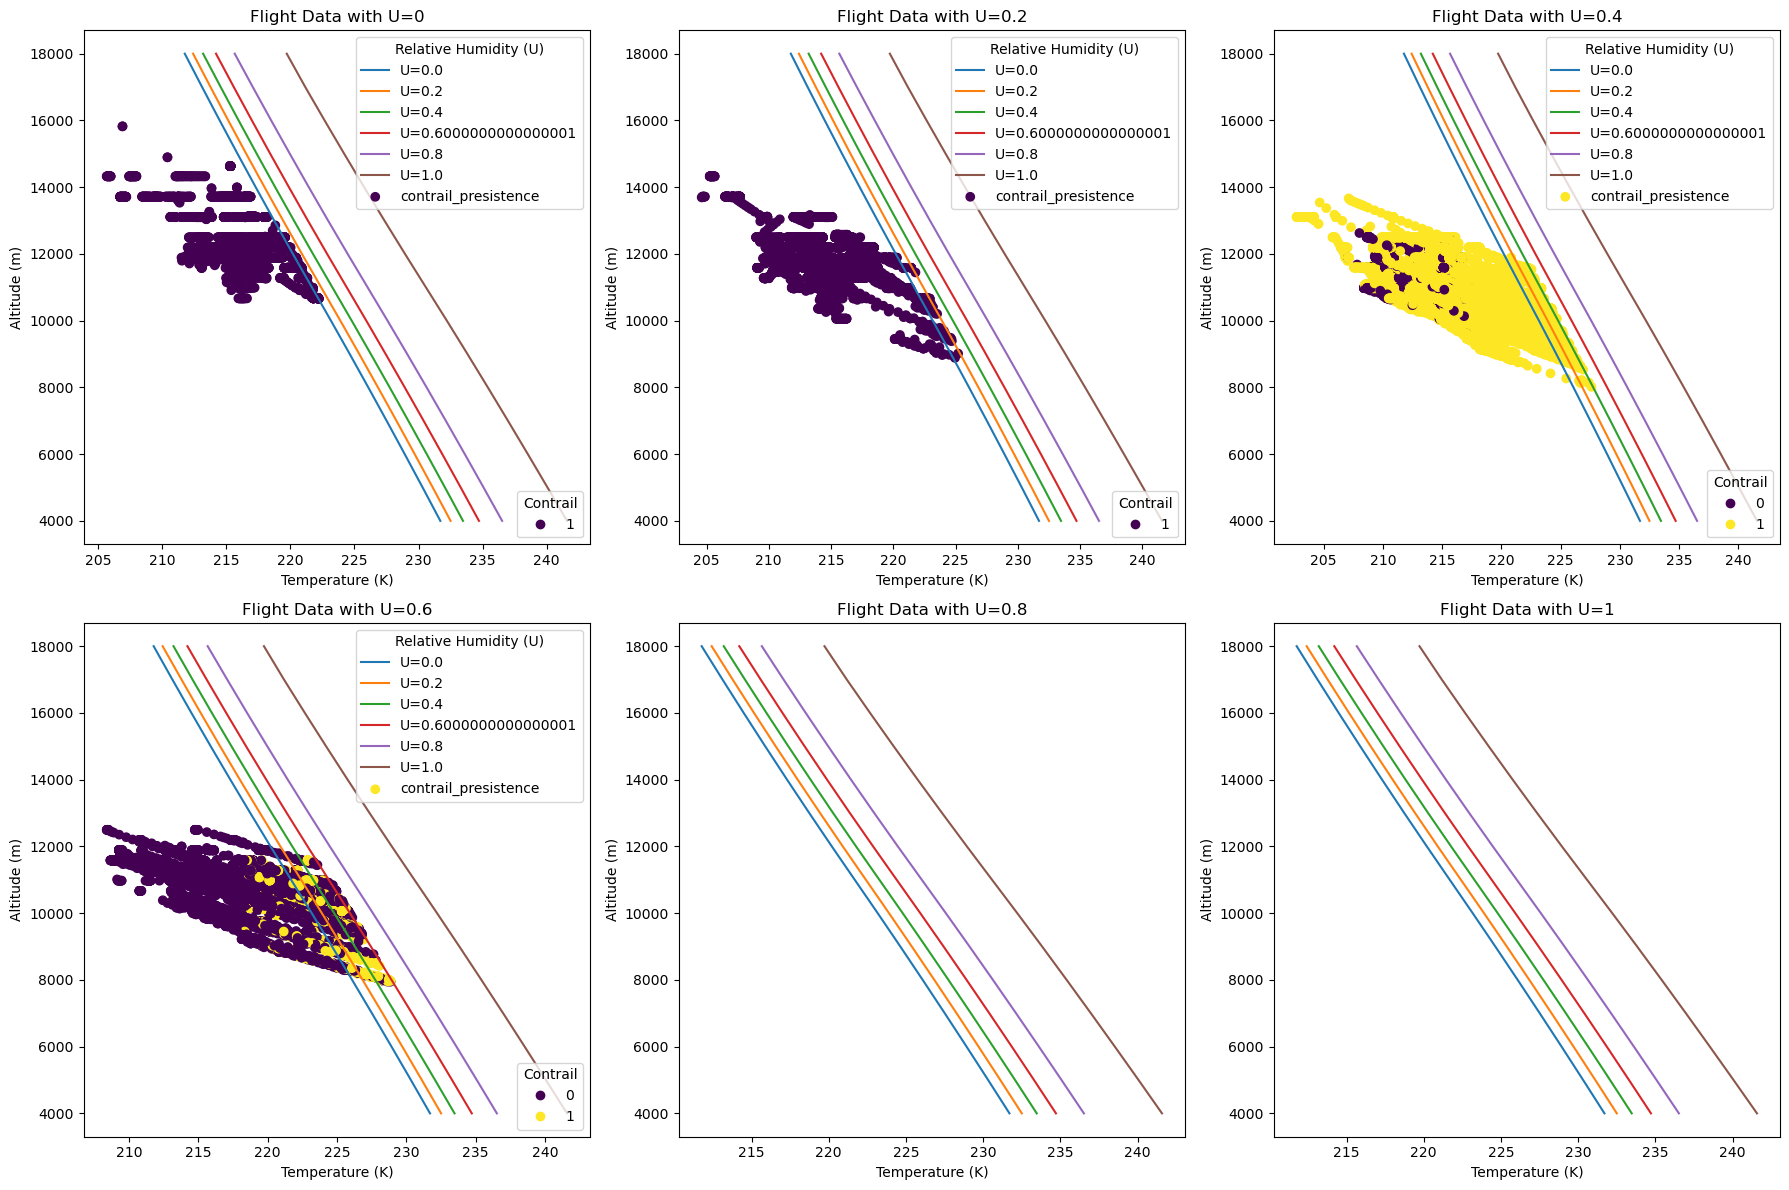

In [24]:
def plot_combined_figure(ax, df_pivot, data_filter1, title_suffix):
    # Plot the first figure on the subplot
    for u_value in df_pivot.columns:
        ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  
        ax.set_title('SAC')
        

    # Map 'Yes' and 'No' to numeric values
    color_mapping = {'Yes': 1, 'No': 0}
    data_filter1['color_numeric_2'] = data_filter1['contrail_presistence'].map(color_mapping)

    # Plot the scatter plot on the subplot
    scatter_plot = ax.scatter(data_filter1['temperature'], data_filter1['altitude_m'], c=data_filter1['color_numeric_2'], label='contrail_presistence')  
    ax.set_title(f'Flight Data {title_suffix}')
    

    # Add a color legend for 'yes' and 'no'
    if len(scatter_plot.get_offsets()):  # Check if there are valid elements in the scatter plot
        legend1 = ax.legend(*scatter_plot.legend_elements(), title='Contrail', loc="lower right")
        legend2 = ax.legend(title='Relative Humidity (U)', loc="upper right")
        ax.add_artist(legend1)

    # Add titles and labels as needed
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Altitude (m)')

# Create subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Call the function for each set of data
plot_combined_figure(axs[0, 0], df_pivot, data_U_0f, 'with U=0')
plot_combined_figure(axs[0, 1], df_pivot, data_U_02f, 'with U=0.2')
plot_combined_figure(axs[0, 2], df_pivot, data_U_04f, 'with U=0.4')
plot_combined_figure(axs[1, 0], df_pivot, data_U_06f, 'with U=0.6')
plot_combined_figure(axs[1, 1], df_pivot, data_U_08f, 'with U=0.8')
plot_combined_figure(axs[1, 2], df_pivot, data_U_1f, 'with U=1')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
#lt.savefig('Saturation with Flight Data.png')

# Show the combined figure
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10968\4034960313.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['color'] = data_filter1['contrail_presistence'].map(color_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10968\4034960313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter1['marker'] = data_filter1['contrail_presistence'].map(marker_mapping)
C:\Users\ASUS\anaconda3\envs\faip\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array us

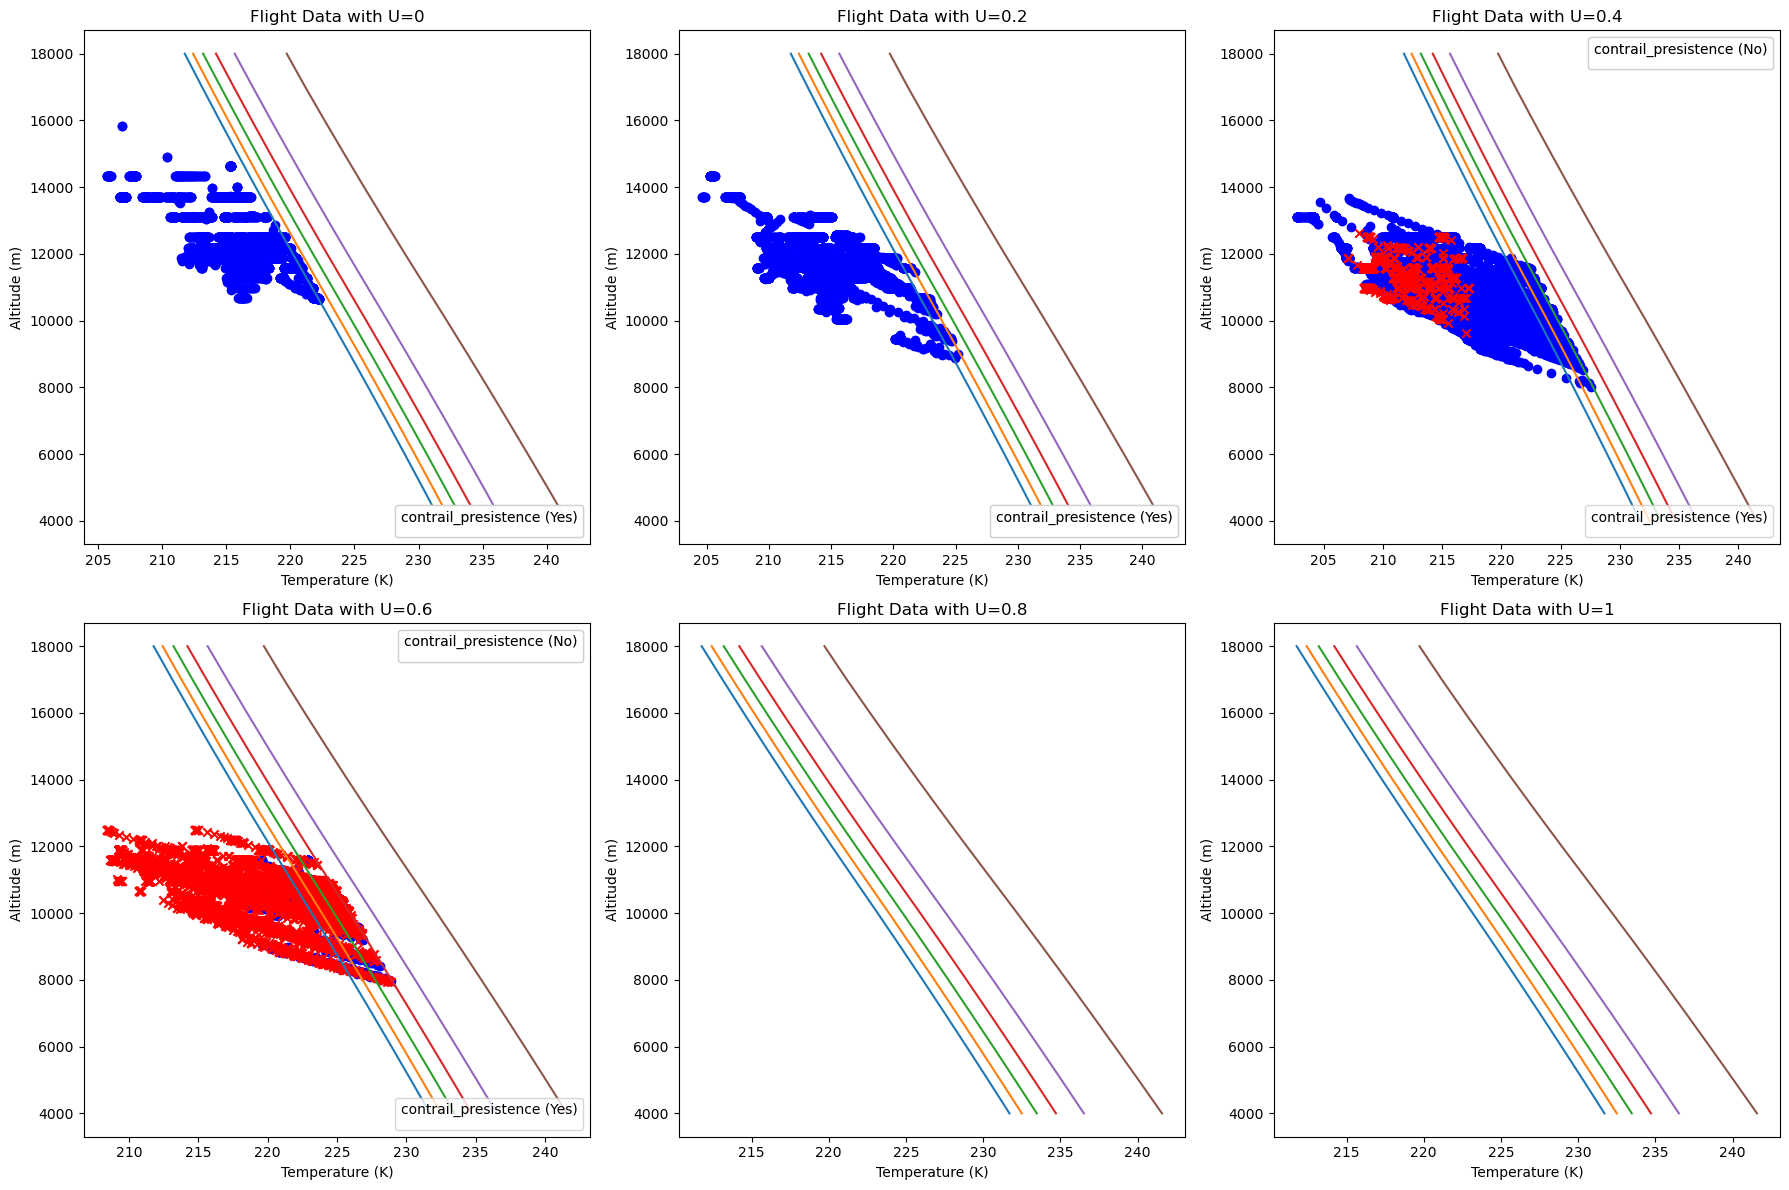

In [25]:
def plot_combined_figure(ax, df_pivot, data_filter1, title_suffix):
    # Plot the first figure on the subplot
    for u_value in df_pivot.columns:
        ax.plot(df_pivot[u_value], df_pivot.index, label=f'U={u_value}')  
        ax.set_title('SAC')
        

    # Map 'Yes' and 'No' to numeric values
    color_mapping = {'Yes': 'blue', 'No': 'red'}
    marker_mapping = {'Yes': 'o', 'No': 'x'}
    data_filter1['color'] = data_filter1['contrail_presistence'].map(color_mapping)
    data_filter1['marker'] = data_filter1['contrail_presistence'].map(marker_mapping)

    # Plot the scatter plot for 'Yes'
    scatter_plot_yes = ax.scatter(
        data_filter1[data_filter1['contrail_presistence'] == 'Yes']['temperature'], 
        data_filter1[data_filter1['contrail_presistence'] == 'Yes']['altitude_m'], 
        c=color_mapping['Yes'], 
        marker=marker_mapping['Yes'],
        label='contrail_presistence (Yes)'
    )  

    # Plot the scatter plot for 'No'
    scatter_plot_no = ax.scatter(
        data_filter1[data_filter1['contrail_presistence'] == 'No']['temperature'], 
        data_filter1[data_filter1['contrail_presistence'] == 'No']['altitude_m'], 
        c=color_mapping['No'], 
        marker=marker_mapping['No'],
        label='contrail_presistence (No)'
    )  

    ax.set_title(f'Flight Data {title_suffix}')

    # Add legends for 'Yes' and 'No'
    if len(scatter_plot_yes.get_offsets()):  
        legend1 = ax.legend(*scatter_plot_yes.legend_elements(), title='contrail_presistence (Yes)', loc="lower right")
        ax.add_artist(legend1)
    if len(scatter_plot_no.get_offsets()):  
        legend2 = ax.legend(*scatter_plot_no.legend_elements(), title='contrail_presistence (No)', loc="upper right")
        ax.add_artist(legend2)

    # Add titles and labels as needed
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Altitude (m)')

# Create subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Call the function for each set of data
plot_combined_figure(axs[0, 0], df_pivot, data_U_0f, 'with U=0')
plot_combined_figure(axs[0, 1], df_pivot, data_U_02f, 'with U=0.2')
plot_combined_figure(axs[0, 2], df_pivot, data_U_04f, 'with U=0.4')
plot_combined_figure(axs[1, 0], df_pivot, data_U_06f, 'with U=0.6')
plot_combined_figure(axs[1, 1], df_pivot, data_U_08f, 'with U=0.8')
plot_combined_figure(axs[1, 2], df_pivot, data_U_1f, 'with U=1')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig('Saturation with Flight Data.png')

# Show the combined figure
plt.show()


----

# The Final Data Filter That Has Presistence Contrails

In [23]:
data_filter_final = data_filter1.query("contrail_presistence == 'Yes'")
data_filter_final

,timestamp,flight_id,icao24,latitude,longitude,altitude,geoaltitude,groundspeed,track,track_unwrapped,...,TLC_interpolation,Contrail,U_line_category,color_numeric,p_ws,air_density,p_w,p_wi,Si,contrail_presistence
0,2022-04-14 10:44:30+00:00,A7MED_040,06a0a3,51.220496,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,222.059742,Yes,0.2,1,0.029425,0.348596,0.601503,1.728380,0.348015,Yes
1,2022-04-14 10:44:45+00:00,A7MED_040,06a0a3,51.227060,3.646622,37000.0,37400.0,437.0,293.749494,293.749494,...,222.059742,Yes,0.2,1,0.029433,0.348592,0.602014,1.728911,0.348204,Yes
2,2022-04-14 10:45:00+00:00,A7MED_040,06a0a3,51.238745,3.602142,37000.0,37400.0,438.0,291.291155,291.291155,...,222.059742,Yes,0.2,1,0.029266,0.348666,0.606931,1.718446,0.353186,Yes
3,2022-04-14 10:45:15+00:00,A7MED_040,06a0a3,51.248611,3.555933,37000.0,37400.0,438.0,287.400841,287.400841,...,222.059742,Yes,0.2,1,0.029086,0.348747,0.611889,1.707198,0.358417,Yes
4,2022-04-14 10:45:30+00:00,A7MED_040,06a0a3,51.257505,3.509445,37000.0,37400.0,439.0,286.949224,286.949224,...,222.059742,Yes,0.2,1,0.028898,0.348832,0.616733,1.695468,0.363754,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72540,2022-03-13 10:26:15+00:00,VLG193Q_107,34608d,50.892700,3.322919,26275.0,26100.0,456.0,31.352050,31.352050,...,228.839379,Yes,0.6,1,0.118406,0.541939,7.546721,7.704528,0.979518,Yes
72541,2022-03-13 10:26:30+00:00,VLG193Q_107,34608d,50.919303,3.348618,26275.0,26100.0,449.0,31.423514,31.423514,...,228.839379,Yes,0.6,1,0.118598,0.541904,7.502395,7.718064,0.972057,Yes
72571,2022-03-13 10:43:30+00:00,VLG230Y_124,346610,51.006454,3.398487,27400.0,27150.0,441.0,35.205094,35.205094,...,228.337135,Yes,0.6,1,0.088427,0.521652,5.588202,5.619670,0.994400,Yes
72572,2022-03-13 10:43:45+00:00,VLG230Y_124,346610,51.031773,3.426895,27000.0,26775.0,435.0,35.261925,35.261925,...,228.515711,Yes,0.6,1,0.098273,0.528779,6.113436,6.298092,0.970681,Yes


---------------------------------

# Plot The Flight Path

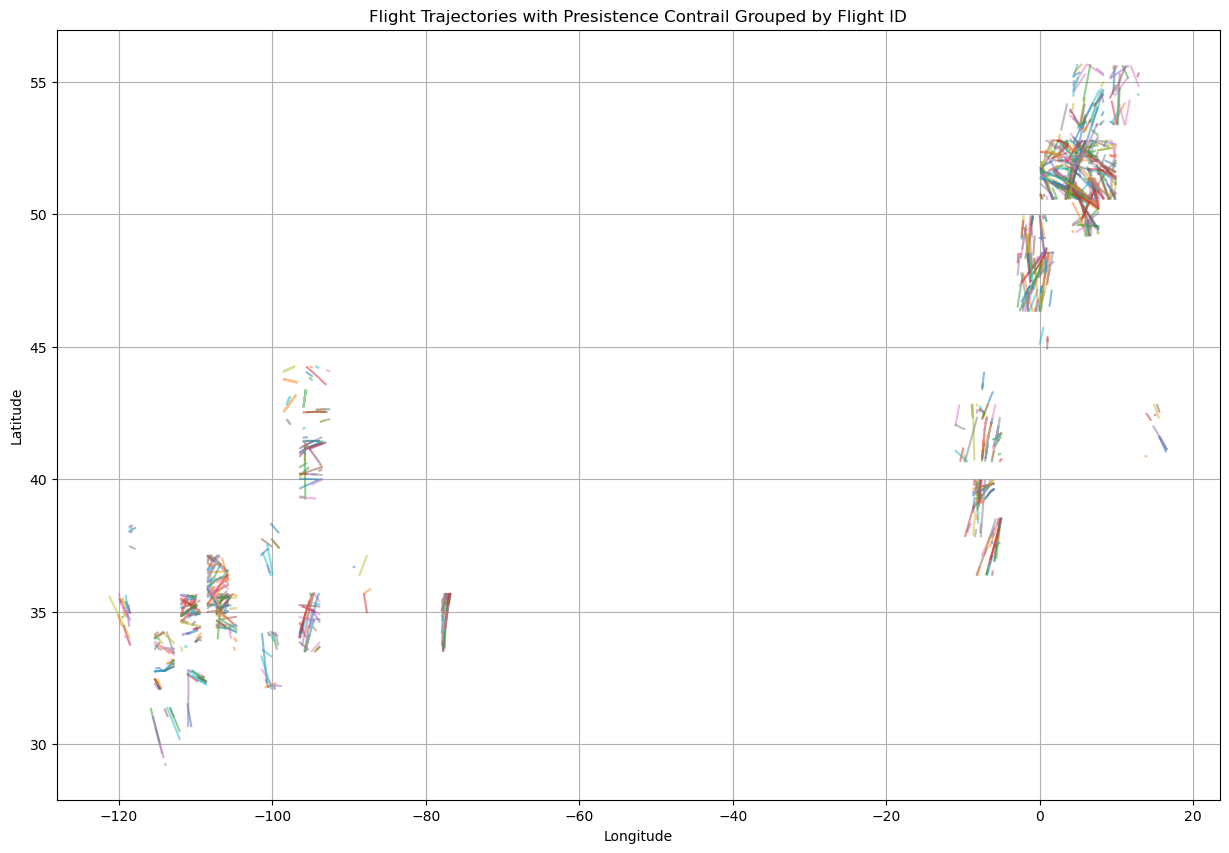

In [25]:
plt.figure(figsize=(15, 10))


for flight_id, group in data_filter_final.groupby('flight_id'):
    plt.plot(group['longitude'], group['latitude'], label=flight_id, alpha=0.5)

plt.title('Flight Trajectories with Presistence Contrail Grouped by Flight ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

In [40]:
import os
import pandas as pd
from PIL import Image


# Load the corner points data from the Excel sheet
coords_df = pd.read_excel("WRScornerPoints_0.xlsx")


def extract_path_row_from_filename(filename):
    # Extract path and row from filename
    # Assuming the format is like LC08_L1TP_200024_20220414_20220420_02_T1_B9
    parts = filename.split('_')
    
    if len(parts) < 3:
        return None, None
    
    path_row_str = parts[2]
    
    # Extracting path and row from the string
    path = int(path_row_str[:3])
    row = int(path_row_str[3:])
    
    return path, row


# Function to get corner coordinates using path and row
def fetch_coordinates_from_df(df, path, row):
    """
    Fetch coordinates from the dataframe based on the given path and row.
    """
    matching_rows = df[(df['PATH'] == path) & (df['ROW'] == row)]
    
    if not matching_rows.empty:
        ul_lat, ul_lon = matching_rows['UL LAT'].values[0], matching_rows['UL LON'].values[0]
        ur_lat, ur_lon = matching_rows['UR LAT'].values[0], matching_rows['UR LON'].values[0]
        ll_lat, ll_lon = matching_rows['LL LAT'].values[0], matching_rows['LL LON'].values[0]
        lr_lat, lr_lon = matching_rows['LR LAT'].values[0], matching_rows['LR LON'].values[0]
        
        return {
            "UL": (ul_lat, ul_lon),
            "UR": (ur_lat, ur_lon),
            "LL": (ll_lat, ll_lon),
            "LR": (lr_lat, lr_lon)
        }
    else:
        print(f"Coordinates not found for PATH: {path}, ROW: {row}")
        return None




# 1. Import and combine parquet files

folder_path = 'C:/Users/ASUS/Directory Jupyter/FAIP Directory/Project/faip_contrail_23/data/opensky_era5'
all_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

data_dict = {}  # Dictionary to store individual DataFrames

for file in all_files:
    file_path = os.path.join(folder_path, file)
    # Using the filename (without the .parquet extension) as the key
    key = file.split('.')[0]
    data_dict[key] = pd.read_parquet(file_path)

# Combine all individual DataFrames into a single DataFrame with multi-index
combined_df = pd.concat(data_dict.values(), keys=data_dict.keys())
data = combined_df


# 2. Fetch and match the images with the parquet data

# Assuming root directory where all folders are located is called 'lowres'
root_dir = 'lowres'
all_images = {}  # Dictionary to store images with their names as keys

# Loop through each folder and fetch the required images
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Ensure it's a directory
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            if image_name.endswith("_B9.png"):
                path, row = extract_path_row_from_filename(image_name)
                
                # Fetch coordinates using the path and row
                coords = fetch_coordinates_from_df(coords_df, path, row)
                
                # Store the image and its coordinates in the all_images dictionary
                all_images[folder_name] = {
                    "image": Image.open(os.path.join(folder_path, image_name)),
                    "coords": coords
                }

# Match these images with their corresponding parquet data
combined_data = {}  # Dictionary to store combined data: image + parquet

for key in list(all_images.keys()):
    parquet_file = key + ".parquet"
    parquet_path = os.path.join('C:/Users/ASUS/Directory Jupyter/FAIP Directory/Project/faip_contrail_23/data/opensky_era5', parquet_file)
    
    if os.path.exists(parquet_path):
        parquet_data = pd.read_parquet(parquet_path)
        combined_data[key] = {
            "image": all_images[key]['image'], 
            "data": parquet_data, 
            "coords": all_images[key]['coords']
        }
    else:
        print(f"Parquet file for {key} not found! data will be deleted")
        del all_images[key]

        
all_folders = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]

# Dictionary to store the images
all_labels = {}

for folder in all_folders:
    # Get the path to the 'label' folder within each main folder
    label_folder_path = os.path.join(root_dir, folder, 'label')
    
    # Check if 'label' folder exists
    if os.path.exists(label_folder_path):
        # Get all images ending with '_contrail.png'
        contrail_images = [img for img in os.listdir(label_folder_path) if img.endswith('_contrail.png')]
        
        # For simplicity, let's assume there's only one contrail image per folder. 
        # If there can be more, this approach will need to be adjusted.
        if contrail_images:
            contrail_img_path = os.path.join(label_folder_path, contrail_images[0])
            all_labels[folder] = Image.open(contrail_img_path)
    else:
        print(f"'label' folder for {folder} not found!")

# Now, 'all_labels' will have the same keys as 'all_images', 
# and will store the corresponding labeled contrail images

# Extend combined_data to include labeled images
for key in combined_data.keys():
    combined_data[key]['label'] = all_labels.get(key, None)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lowres'